## Bike Sharing Assignment

### Step 1: Data Understanding & Data Loading

In [727]:
# Ignore the warnings

import warnings
warnings.filterwarnings('ignore')

In [728]:
# Import the required Libarires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression 
# This module provides a linear regression implementation, a popular machine learning algorithm for predicting a continuous target variable based on one or more predictor variables.
from sklearn.model_selection import train_test_split
# This module is used for splitting a dataset into training and testing sets. It helps in evaluating the performance of a machine learning model on an independent dataset.
from sklearn.feature_selection import RFE
# Recursive Feature Elimination (RFE) is a feature selection technique. It works by recursively removing the least important features until the desired number of features is reached. It can be used to improve the model's performance and reduce overfitting.

from sklearn import preprocessing
# The preprocessing module provides various utilities for preprocessing data before feeding it into a machine learning model. This can include scaling, normalization, encoding categorical variables, etc..
from sklearn.preprocessing import LabelEncoder
# This class is used to encode categorical labels into numerical representations. It is commonly employed to convert categorical target variables into a format suitable for machine learning algorithms.
from sklearn.preprocessing import MinMaxScaler
# This scaler transforms features by scaling them to a specified range, often between 0 and 1. It is particularly useful when working with algorithms that are sensitive to the scale of input features, such as support vector machines and k-nearest neighbors.

# These functions are metrics used to evaluate the performance of regression models
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Computes the R-squared (coefficient of determination) score, which measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
# Calculates the mean squared error, which is the average of the squared differences between predicted and actual values.
# Computes the mean absolute error, which is the average of the absolute differences between predicted and actual values.

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# statsmodels is a library for estimating and testing statistical models. api provides a wide range of statistical models.
# variance_inflation_factor is used to calculate the variance inflation factor, which helps assess the severity of multicollinearity in a regression analysis.

In [729]:
# Screen Adjustment
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [730]:
# Read the data
# sharedbike = sb
sharedbike = pd.read_csv('day.csv')

In [731]:
# Head of the Dataset

sharedbike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [732]:
# Knowing the shape

sharedbike.shape

(730, 16)

In [733]:
# Describing the Column

sharedbike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [734]:
#Column Related Information

sharedbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [735]:
# Checking the null value in column data & dtype

sharedbike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [736]:
# checking unique values

sharedbike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [737]:
# Renaming the few columns for better understanding

sharedbike.rename(columns={'dteday':'date','yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [738]:
sharedbike.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Duplicate Column Analysis

In [739]:
#Creation of new data-frame from the [Original set]

dummybike = sharedbike.copy()

In [740]:
dummybike.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [741]:
# Applying of drop_duplicates method will remove the duplicates from new dataset & Original dataset will be intact.
# subset = None shows all columns should be considered when identifying duplicate rows.

dummybike.drop_duplicates(subset=None, inplace=True)

In [742]:
# After removing the duplicates, so as per the conclusion 0 duplicates values observed in the dataset.
dummybike.shape

(730, 16)

### Cleaning the data

In [743]:
# Creation of dataframe, without instant variable.

bikedummy = sharedbike.iloc[:,1:16]

In [744]:
# Applying Valuecount() for entire dataframe, identify the junk values present in the dataset 

for col in bikedummy:
    print(bikedummy[col].value_counts(ascending=False), '\n\n\n')

date
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64 



season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 



year
0    365
1    365
Name: count, dtype: int64 



month
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64 



holiday
0    709
1     21
Name: count, dtype: int64 



weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 



workingday
1    499
0    231
Name: count, dtype: int64 



weathersit
1    463
2    246
3     21
Name: count, dtype: int64 



temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: count, Length: 498, dtype: int64 



atemp
32.

### Based on the above value count, No Unknown values are present in the above dataframe

### Eliminating unnecessary and redundant columns
---------------------------------------------------
##### instant: Unique index value
##### dteday: which is date, since we have individual year & Month, we can drop
##### casual & Registered: are comes under child of cnt column (Total number of bikes count), where our main focus is on cnt, which is target variable.

In [745]:
sharedbike.columns

Index(['instant', 'date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [746]:
sharedbike.drop(['instant','date','casual','registered'],axis=1,inplace=True)

In [747]:
sharedbike.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [748]:
sharedbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Map all the Categorical values back from the data dictionary [Encoding/Map]

#### Season, Month, Weekday, Workingday, weathersit [Categorical]

In [749]:
sharedbike.season=sharedbike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [750]:
sharedbike.month = sharedbike.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [751]:
sharedbike.weekday = sharedbike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [752]:
sharedbike.weathersit = sharedbike.weathersit.map({1:'clear',2:'mist',3:'light snow_rain ',4:'heavy snow_pallets'})

In [753]:
sharedbike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [754]:
sharedbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Step 2: Exploratory Data Anlaysis

### Visualisation of Categorical Variables

#### Construct boxplots for all categorical variables (prior to creating dummy variables) in comparison to the target variable 'cnt' to observe the relationship between each predictor variable Vs target variable.

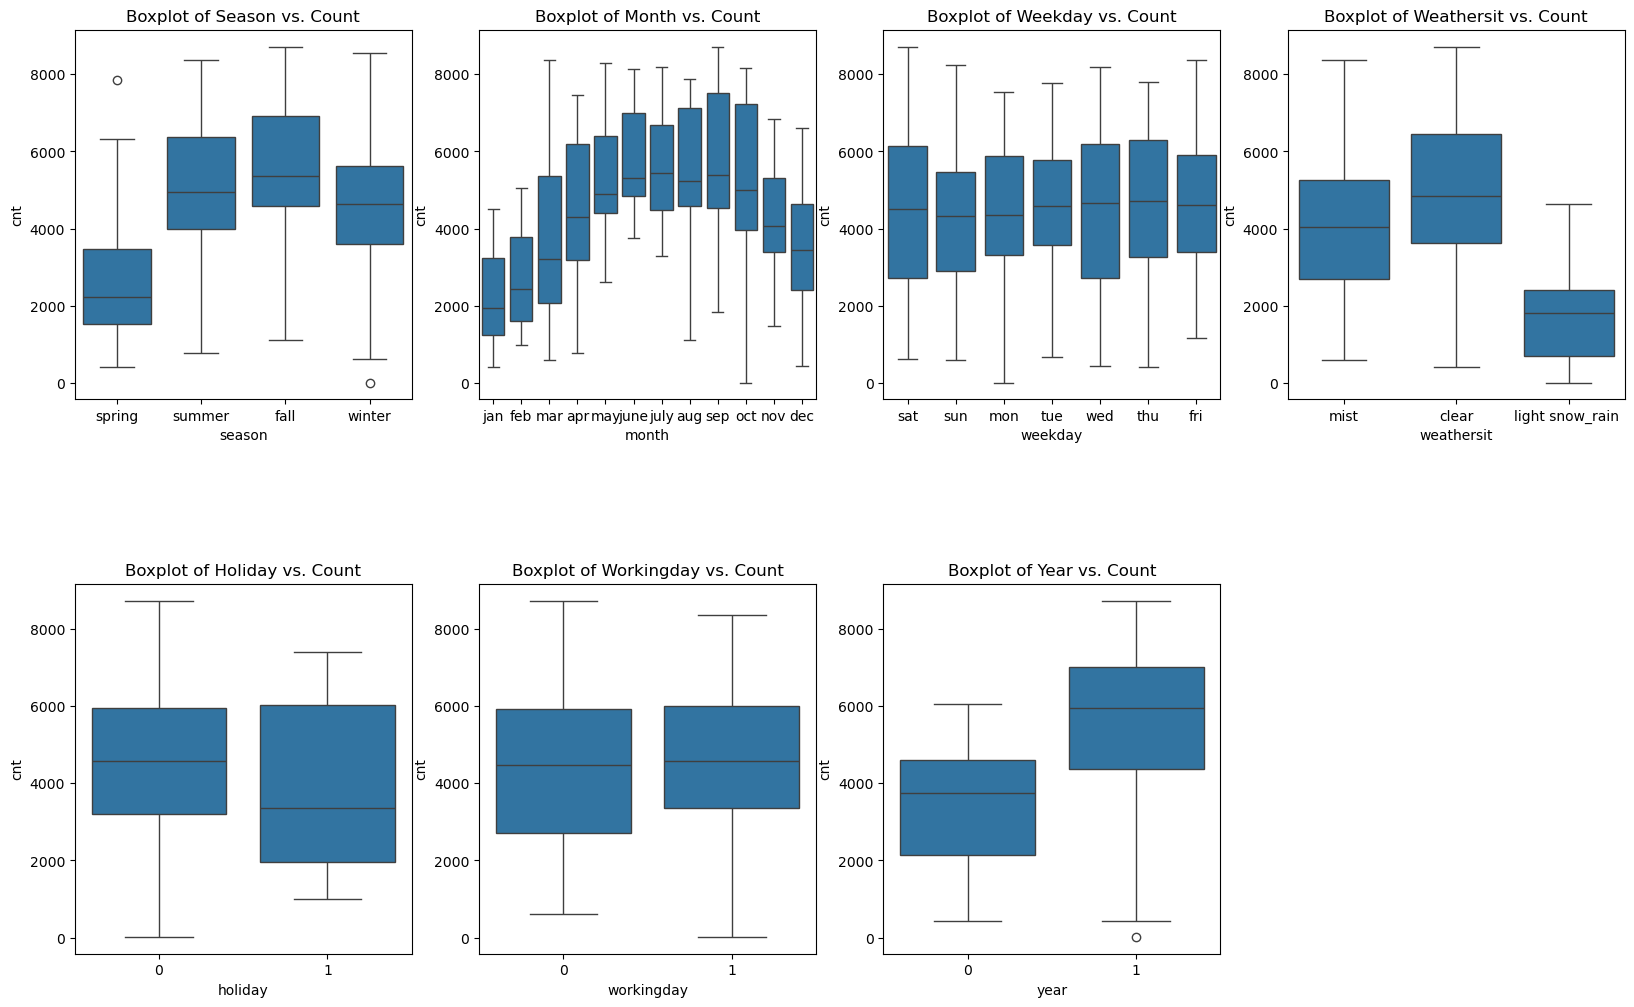

In [755]:
# Set the size of the entire figure
plt.figure(figsize=(20, 12))

# Specify the subplot grid
grid = plt.GridSpec(2, 4, hspace=0.5, wspace=0.2)

# Plotting subplots using a loop
for i, col in enumerate(['season', 'month', 'weekday', 'weathersit', 'holiday', 'workingday', 'year'], start=1):
    plt.subplot(grid[i-1])
    sns.boxplot(x=col, y='cnt', data=sharedbike)
    plt.title(f'Boxplot of {col.capitalize()} vs. Count')

# Show the plot
plt.show()

In [756]:
season_statistics = sharedbike.groupby('season')['cnt'].agg(['median']).reset_index()

print(season_statistics)

# Most of the bookings observed for Fall with 5353 which is highest, next Summer 4941 ,Winter is 4634 and spring is 2222, this indicates, season can be a
# good predictor for the dependent variable

# Based on the Boxplot of Month Vs Count, May - Oct is the peak season, where the median of all these months are more than 4100 bookings per month, which
# indicates that Month is a good predicotr for the dependent variable.

# Based on the Boxplot of weekday Vs count - It indicates that all the day median is over 4k - 5k, which indicates no change in any day of the week
# so will make model to decide if this need to be added or not.

# Based on Weathersit boxplot - It indicates that the sale is more on when the weather is Clear, Few clouds, Partly cloudly. which is a good predictor
# for the dependent variable

# To Distinguish between weekday or holiday for major traffic predicotor, it shows weekday having [2k - 6k]  bookings. which means weekday is a
# good predictor for the dependent variable

   season  median
0    fall  5353.5
1  spring  2222.5
2  summer  4941.5
3  winter  4634.5


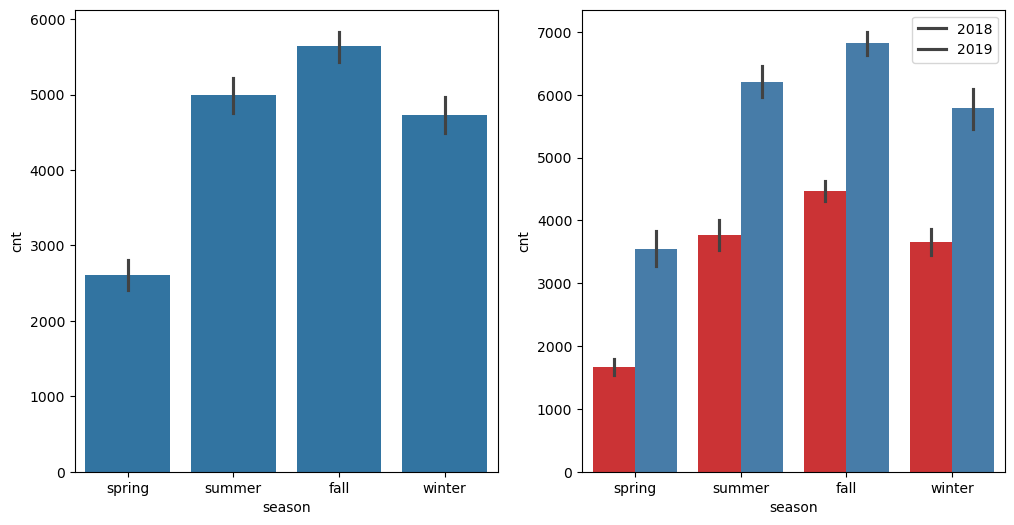

In [757]:
def plot_categorical_columns(column, data):
    # Set the figure size
    plt.figure(figsize=(12, 6))
    
    # Plot the bar chart without considering the 'year' factor
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=data)
    
    # Plot the bar chart considering the 'year' factor with a color palette
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=data, hue='year', palette='Set1')
    
    # Add legend for the 'year' factor
    plt.legend(labels=['2018', '2019'])
    
    # Show the plots
    plt.show()

# Example usage
plot_categorical_columns('season', sharedbike)

In [758]:
# As per the observation, 2018 & 2019, 2019 has more shared bikes than 2010 on fall season. 

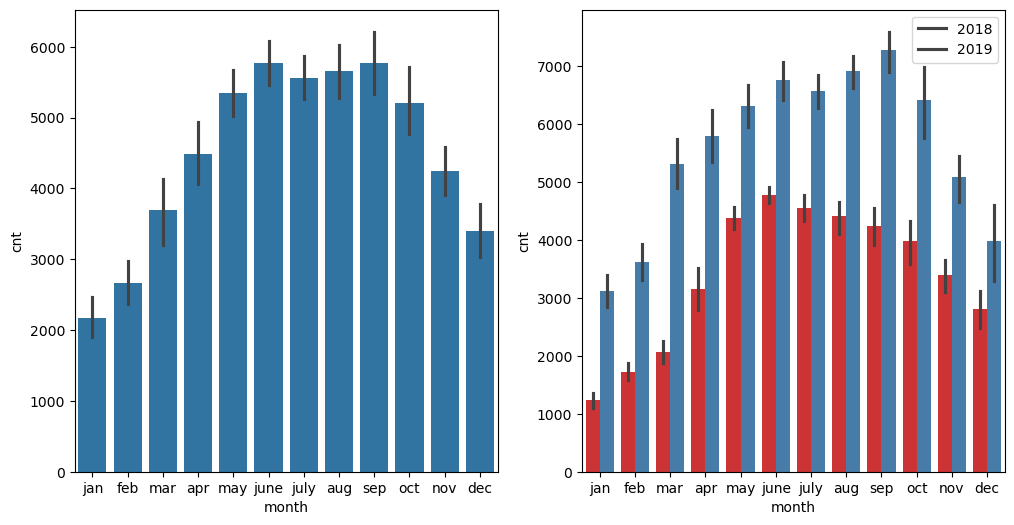

In [759]:
plot_categorical_columns('month', sharedbike)

### Visualisation of Numerical Variables

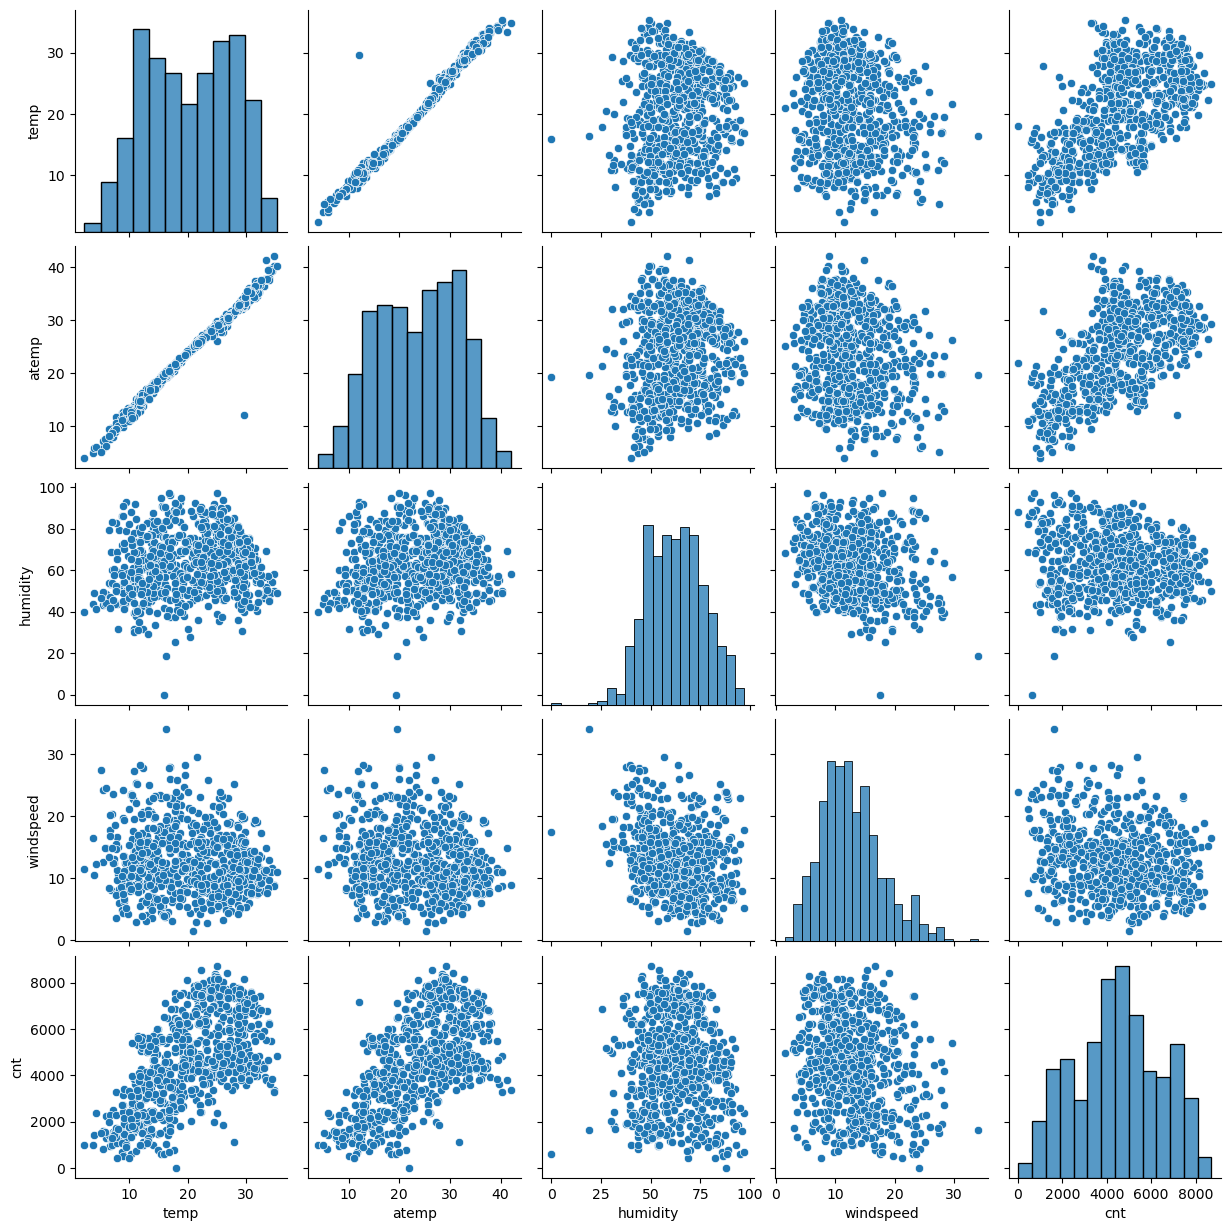

In [760]:
sns.pairplot(data=sharedbike,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

In [761]:
# The Pair-Plot above indicates a linear relationship among 'temp,' 'atemp,' and 'cnt.'

In [762]:
# Examining the correlation coefficients to identify highly correlated variables.

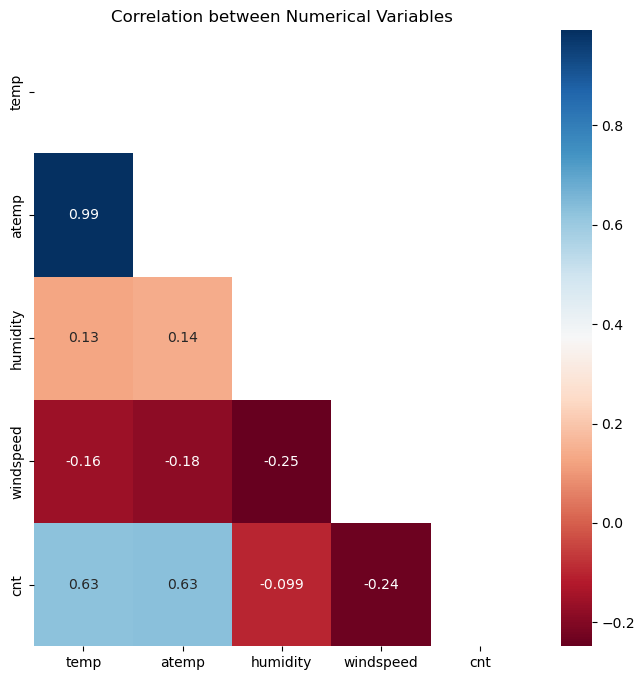

In [763]:
# Set the figure size
plt.figure(figsize=(8, 8))

# Create an upper triangular matrix to mask the lower triangle
matrix = np.triu(sharedbike[['temp', 'atemp', 'humidity', 'windspeed', 'cnt']].corr())

# Plot the heatmap with annotation, using the RdBu color map
sns.heatmap(sharedbike[['temp', 'atemp', 'humidity', 'windspeed', 'cnt']].corr(),
            annot=True,
            cmap="RdBu",
            mask=matrix)

# Set the title of the plot
plt.title("Correlation between Numerical Variables")

# Show the plot
plt.show()

In [764]:
# There exists a linear relationship between the variables 'temp' and 'atemp.' 
# However, due to multicollinearity concerns, both parameters cannot be included in the model simultaneously. 
# The decision regarding which parameter(s) to retain will be determined by assessing Variance Inflation Factor (VIF) and p-values in relation to other variables.

### Step 3: Preparation of data

#### Creating dummy variables for the 'month,' 'weekday,' 'weathersit,' and 'season' variables.

In [765]:
sharedbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [766]:
# Datatype conversion

sharedbike['season'] = sharedbike['season'].astype('category')
sharedbike['weathersit'] = sharedbike['weathersit'].astype('category')
sharedbike['month'] = sharedbike['month'].astype('category')
sharedbike['weekday'] = sharedbike['weekday'].astype('category')

In [767]:
#After Conversion to Category data type

sharedbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    int64   
 2   month       730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [768]:
sharedbike = pd.get_dummies(sharedbike, drop_first=True)
sharedbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         730 non-null    int64  
 1   holiday                      730 non-null    int64  
 2   workingday                   730 non-null    int64  
 3   temp                         730 non-null    float64
 4   atemp                        730 non-null    float64
 5   humidity                     730 non-null    float64
 6   windspeed                    730 non-null    float64
 7   cnt                          730 non-null    int64  
 8   season_spring                730 non-null    bool   
 9   season_summer                730 non-null    bool   
 10  season_winter                730 non-null    bool   
 11  month_aug                    730 non-null    bool   
 12  month_dec                    730 non-null    bool   
 13  month_feb           

In [769]:
# Get the list of column names after one-hot encoding
dummy_columns = sharedbike.columns[8:]

# Convert boolean columns to integers
sharedbike[dummy_columns] = sharedbike[dummy_columns].astype(int)

# Check the data types after conversion
sharedbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         730 non-null    int64  
 1   holiday                      730 non-null    int64  
 2   workingday                   730 non-null    int64  
 3   temp                         730 non-null    float64
 4   atemp                        730 non-null    float64
 5   humidity                     730 non-null    float64
 6   windspeed                    730 non-null    float64
 7   cnt                          730 non-null    int64  
 8   season_spring                730 non-null    int64  
 9   season_summer                730 non-null    int64  
 10  season_winter                730 non-null    int64  
 11  month_aug                    730 non-null    int64  
 12  month_dec                    730 non-null    int64  
 13  month_feb           

In [770]:
sharedbike.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light snow_rain,weathersit_mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [771]:
sharedbike.shape

(730, 30)

### Step 4: Dividing the data into Training and Testing sets:

### Now, we will partition the data into TRAIN and TEST sets using the train_test_split method from the sklearn package, maintaining a 70:30 ratio.

In [772]:
from sklearn.model_selection import train_test_split

# Setting 'random_state' ensures that the train and test data sets consistently contain the same rows

np.random.seed(0)
train_data, test_data = train_test_split(sharedbike, train_size=0.70, test_size=0.30, random_state=333)

In [773]:
train_data.shape

(510, 30)

In [774]:
test_data.shape

(219, 30)

### Step 5: Rescaling

In [775]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [776]:
train_data.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light snow_rain,weathersit_mist
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,0,1,...,0,0,0,0,1,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,1,0,0,1,0,0,0,0,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,0,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,0,0,0,1,0,0,0,0,1
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,1,0,...,0,0,0,0,1,0,0,0,0,0


In [777]:
sharedbike.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_july',
       'month_june', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_light snow_rain ',
       'weathersit_mist'],
      dtype='object')

In [778]:
# Standardize all numeric variables using scaler()

numeric_variables = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

train_data[numeric_variables] = scaler.fit_transform(train_data[numeric_variables])

In [779]:
train_data.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light snow_rain,weathersit_mist
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,0,1,...,0,0,0,0,1,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,1,0,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,0,1,0,0,0,0,1
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,...,0,0,0,0,1,0,0,0,0,0


In [780]:
train_data.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light snow_rain,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.24902,0.247059,...,0.084314,0.082353,0.139216,0.150980,0.143137,0.129412,0.141176,0.150980,0.025490,0.341176
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.43287,0.431725,...,0.278131,0.275172,0.346511,0.358381,0.350557,0.335985,0.348545,0.358381,0.157763,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlation Matrix

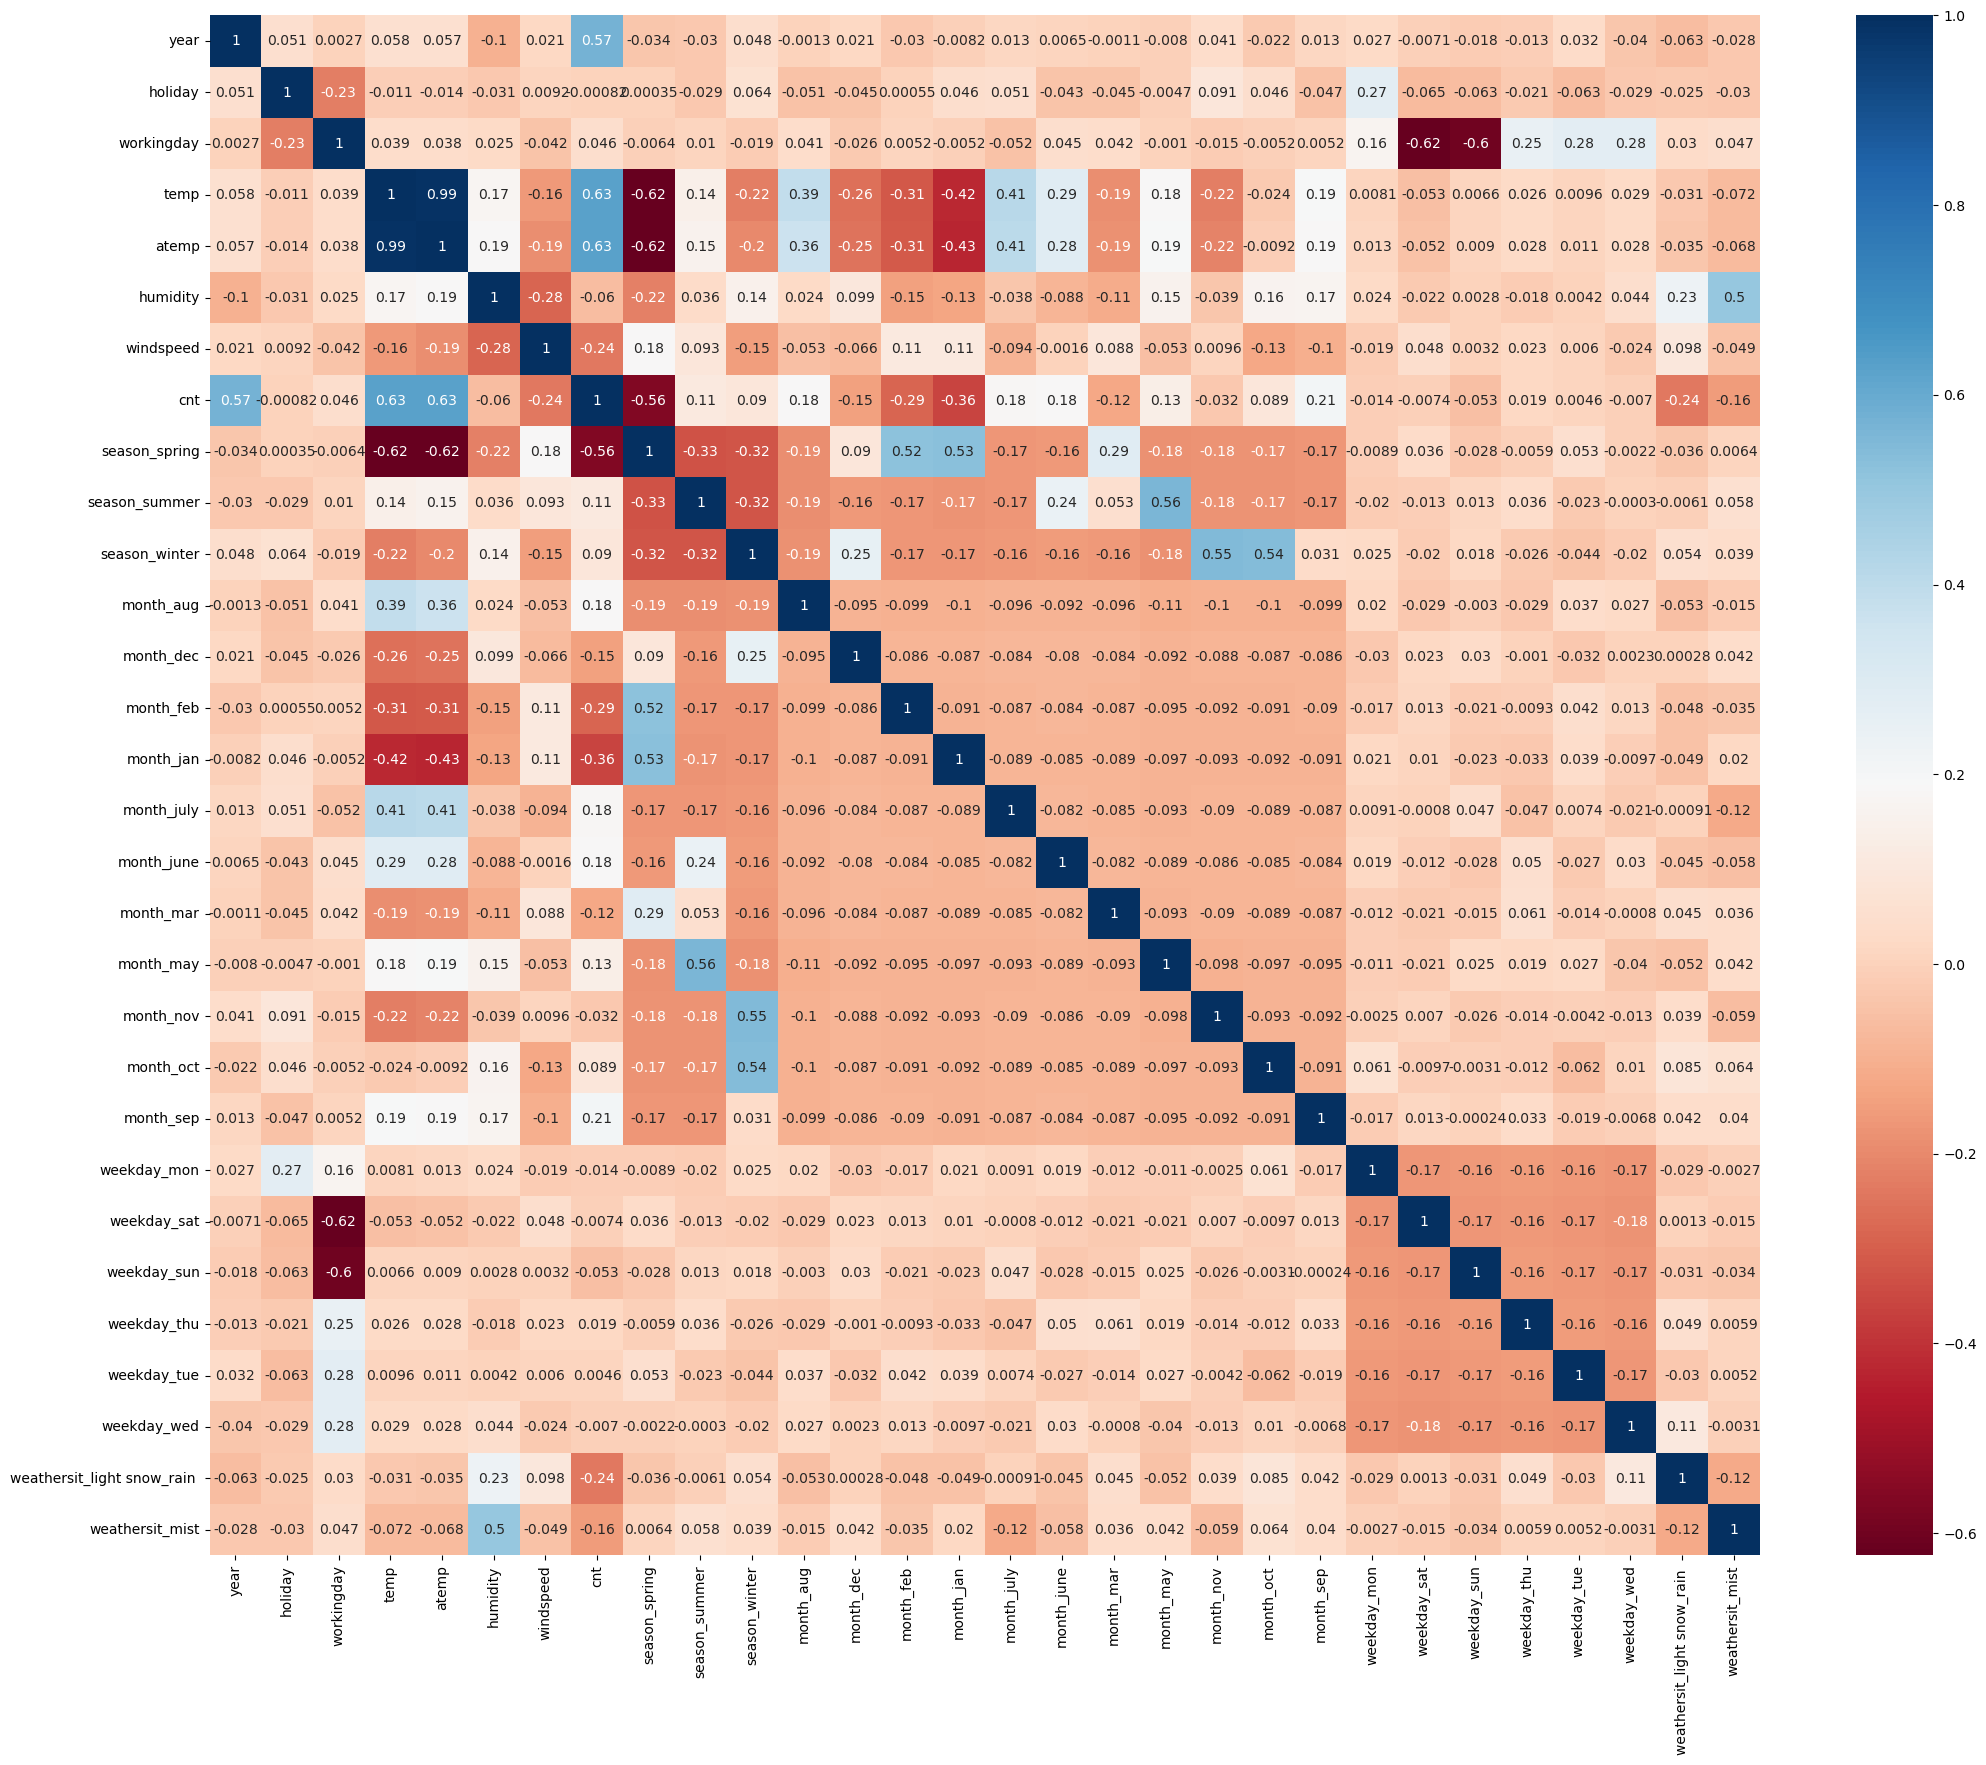

In [781]:
plt.figure(figsize = (25,20))
sns.heatmap(train_data.corr(), annot = True, cmap="RdBu")
plt.show()

In [782]:

# After Creation of dummy variables
# The heatmap distinctly indicates variables that exhibit multicollinearity and highlights those with high collinearity with the target variable. 
# We will consistently refer to this map throughout the process of constructing the linear model to validate various correlated values, 
# considering VIF and p-value, to identify the correct variables for inclusion or elimination from the model.

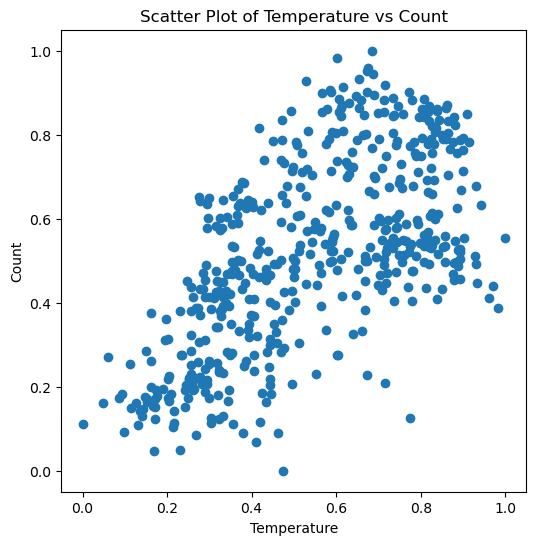

In [783]:
# Displaying the trend through a Scatter plot to visualize the correlation.

plt.figure(figsize=[6, 6])
plt.scatter(train_data.temp, train_data.cnt)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Scatter Plot of Temperature vs Count')
plt.show()

In [784]:
# Observed positive Correlation between Temperature and Count.

## Step 6: Constructing a Linear Model

### Separating into X and Y sets for model development

### Feature elimination using the Recursive Feature Elimination (RFE) technique will utilize the LinearRegression function from SciKit 
### Learn due to its compatibility with RFE, a utility from sklearn.

In [785]:
# Assuming train_data includes both features and target variable 'cnt'
X_train = train_data.drop('cnt', axis=1)  # Assuming 'cnt' is the target variable
y_train = train_data['cnt']

In [786]:
# Importing RFE and LinearRegression Libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of variables equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)  # Specify n_features_to_select instead of passing it as a positional argument
rfe = rfe.fit(X_train, y_train)


In [787]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 11),
 ('season_winter', True, 1),
 ('month_aug', False, 9),
 ('month_dec', False, 4),
 ('month_feb', False, 8),
 ('month_jan', False, 7),
 ('month_july', True, 1),
 ('month_june', False, 13),
 ('month_mar', True, 1),
 ('month_may', False, 5),
 ('month_nov', False, 3),
 ('month_oct', False, 12),
 ('month_sep', True, 1),
 ('weekday_mon', False, 6),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 15),
 ('weathersit_light snow_rain ', True, 1),
 ('weathersit_mist', False, 2)]

In [788]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'season_spring', 'season_winter', 'month_july',
       'month_mar', 'month_sep', 'weekday_sat', 'weekday_sun',
       'weathersit_light snow_rain '],
      dtype='object')


In [789]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['season_summer', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_june', 'month_may', 'month_nov', 'month_oct', 'weekday_mon',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_mist'],
      dtype='object')

## Building 1st Linear Regression model

## Model 1

In [790]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [791]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [792]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,temp,53.37
4,atemp,51.69
2,workingday,41.54
12,weekday_sat,9.82
13,weekday_sun,9.46
7,season_spring,2.65
1,holiday,2.44
8,season_winter,1.78
9,month_july,1.31
5,humidity,1.27


### Temp Shows High VIF Value.

In [793]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.3
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          5.41e-181
Time:                        00:20:40   Log-Likelihood:                 493.12
No. Observations:                 510   AIC:                            -956.2
Df Residuals:                     495   BIC:                            -892.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [794]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['temp'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,workingday,41.42
11,weekday_sat,9.80
12,weekday_sun,9.45
3,atemp,2.84
6,season_spring,2.59
1,holiday,2.43
7,season_winter,1.71
8,month_july,1.30
4,humidity,1.27
5,windspeed,1.18


## Model 2

### VIF Check

In [795]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [796]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [797]:
# Check the parameters obtained

lr2.params

const                          0.301103
year                           0.226680
holiday                        0.050627
workingday                     0.090083
atemp                          0.521675
humidity                      -0.267327
windspeed                     -0.186873
season_spring                 -0.121572
season_winter                  0.054176
month_july                    -0.048779
month_mar                      0.043620
month_sep                      0.071920
weekday_sat                    0.105185
weekday_sun                    0.055207
weathersit_light snow_rain    -0.223861
dtype: float64

In [798]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.0
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          1.09e-180
Time:                        00:20:42   Log-Likelihood:                 489.67
No. Observations:                 510   AIC:                            -951.3
Df Residuals:                     496   BIC:                            -892.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [799]:
# As Temp shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(["workingday"], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,humidity,14.96
2,atemp,12.98
4,windspeed,4.83
5,season_spring,2.47
0,year,2.04
6,season_winter,1.86
7,month_july,1.40
10,weekday_sat,1.22
11,weekday_sun,1.21
8,month_mar,1.20


## Model 3

In [800]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,14.96
2,atemp,12.98
4,windspeed,4.83
5,season_spring,2.47
0,year,2.04
6,season_winter,1.86
7,month_july,1.40
10,weekday_sat,1.22
11,weekday_sun,1.21
8,month_mar,1.20


In [801]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [802]:
lr3.params

const                          0.391186
year                           0.226680
holiday                       -0.039456
atemp                          0.521675
humidity                      -0.267327
windspeed                     -0.186873
season_spring                 -0.121572
season_winter                  0.054176
month_july                    -0.048779
month_mar                      0.043620
month_sep                      0.071920
weekday_sat                    0.015102
weekday_sun                   -0.034876
weathersit_light snow_rain    -0.223861
dtype: float64

In [803]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.0
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          1.09e-180
Time:                        00:20:46   Log-Likelihood:                 489.67
No. Observations:                 510   AIC:                            -951.3
Df Residuals:                     496   BIC:                            -892.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [804]:
# As Temp shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(["humidity"], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.76
2,atemp,4.74
0,year,2.03
4,season_spring,1.79
5,season_winter,1.38
6,month_july,1.35
9,weekday_sat,1.22
10,weekday_sun,1.21
7,month_mar,1.20
8,month_sep,1.19


## Model 4

In [805]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.76
2,atemp,4.74
0,year,2.03
4,season_spring,1.79
5,season_winter,1.38
6,month_july,1.35
9,weekday_sat,1.22
10,weekday_sun,1.21
7,month_mar,1.20
8,month_sep,1.19


In [806]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [807]:
lr4.params

const                          0.215600
year                           0.234521
holiday                       -0.035897
atemp                          0.483345
windspeed                     -0.124886
season_spring                 -0.121949
season_winter                  0.043801
month_july                    -0.030617
month_mar                      0.051505
month_sep                      0.061270
weekday_sat                    0.015087
weekday_sun                   -0.035998
weathersit_light snow_rain    -0.286973
dtype: float64

In [808]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          3.68e-167
Time:                        00:20:48   Log-Likelihood:                 454.80
No. Observations:                 510   AIC:                            -883.6
Df Residuals:                     497   BIC:                            -828.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## The VIF value appears satisfactory as it has dropped below 5.

## Step 6: involves conducting residual analysis on both the training and validation datasets.



In [809]:
X_train_lm4

,const,year,holiday,atemp,windspeed,season_spring,season_winter,month_july,month_mar,month_sep,weekday_sat,weekday_sun,weathersit_light snow_rain
483,1.0,1,0,0.487055,0.194850,0,0,0,0,0,0,1,0
650,1.0,1,0,0.409971,0.255118,0,1,0,0,0,1,0,0
212,1.0,0,0,0.819376,0.276919,0,0,0,0,0,0,0,0
714,1.0,1,0,0.381804,0.161523,0,1,0,0,0,0,1,0
8,1.0,0,0,0.048706,0.700017,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1.0,1,0,0.463017,0.274350,0,0,0,0,0,0,0,0
444,1.0,1,0,0.569931,0.138467,0,0,0,1,0,0,0,0
46,1.0,0,0,0.311266,0.472919,1,0,0,0,0,0,0,0
374,1.0,1,0,0.314713,0.340487,1,0,0,0,0,0,0,0


In [810]:
# The model lr_4 can be deemed appropriate, given its apparent minimal multicollinearity among predictors 
# and the significance of p-values associated with all predictors.

In [811]:
# With an F-Statistics value of 169.9 (exceeding 1) and an extremely low p-value of 3.68e-167, 
# nearly approaching zero, it indicates the overall significance of the model.

### Step 6: Conducting Residual Analysis on the Training Data and Validation

In [812]:
y_train_pred = lr4.predict(X_train_lm4)


Text(0.5, 0, 'Residuals')

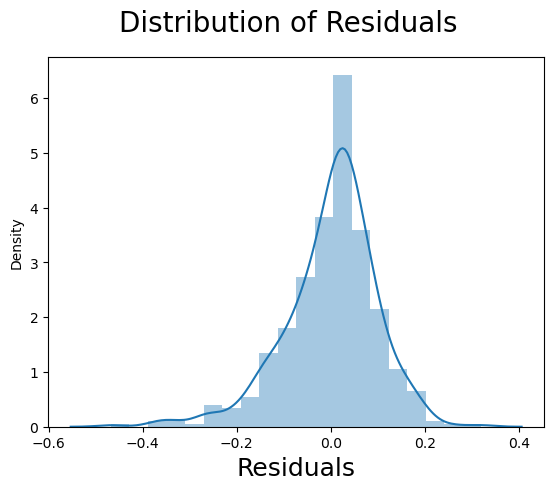

In [813]:
# Normal Distribution of Residuals

# Visualize the distribution of error terms using a histogram

figure = plt.figure()
sns.distplot((y_train - y_train_pred), bins=20)
figure.suptitle('Distribution of Residuals', fontsize=20)
plt.xlabel('Residuals', fontsize=18)



### The residuals adhere to a normal distribution.

In [814]:
# Multicolinearlity

calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.76
2,atemp,4.74
0,year,2.03
4,season_spring,1.79
5,season_winter,1.38
6,month_july,1.35
9,weekday_sat,1.22
10,weekday_sun,1.21
7,month_mar,1.20
8,month_sep,1.19


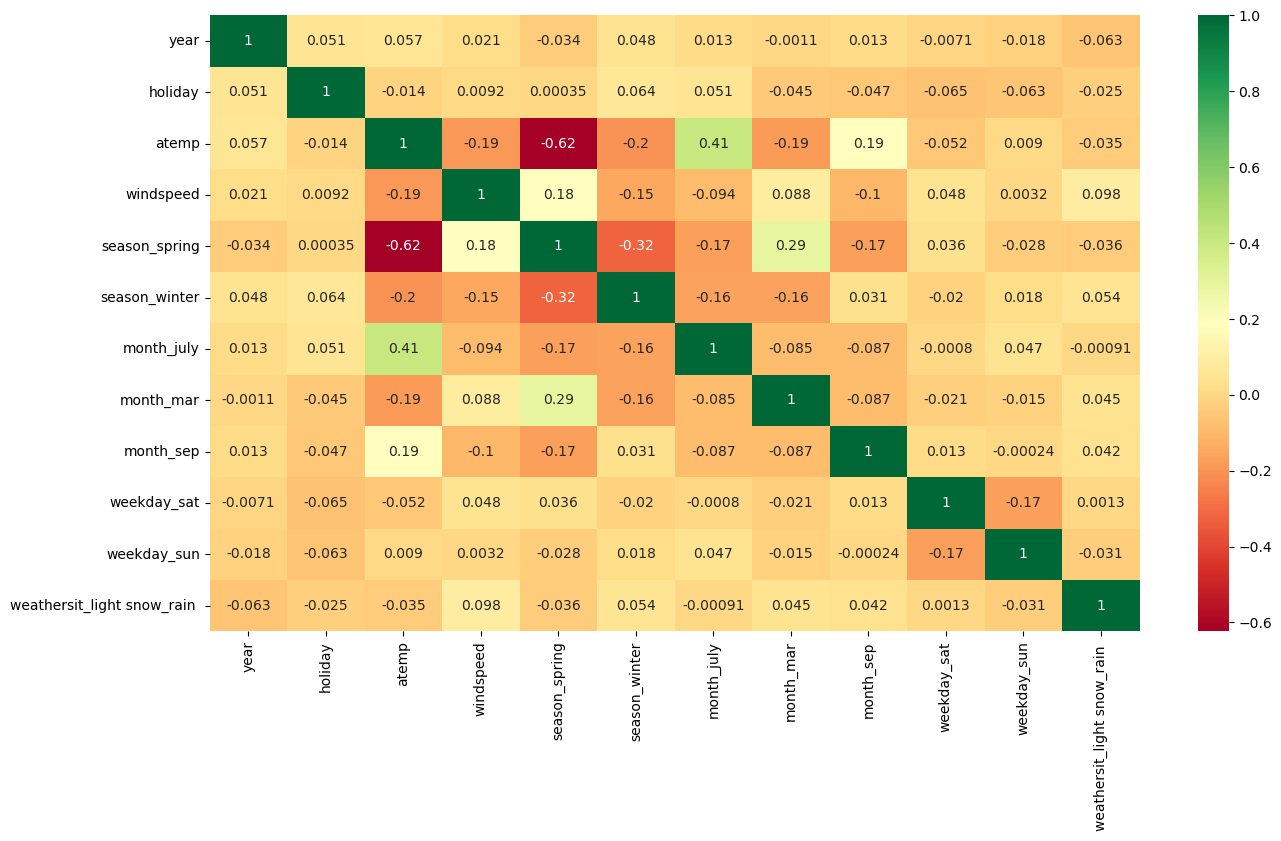

In [815]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

In [816]:
# VIF values are below 5, indicating favorable conditions, and the absence of multicollinearity is 
# evident from the heatmap.

### Linearity

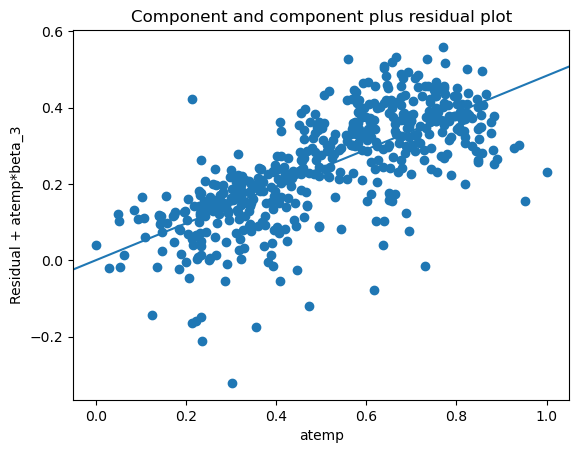

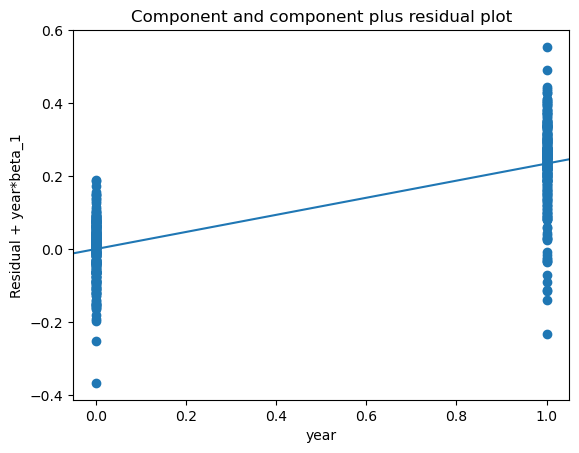

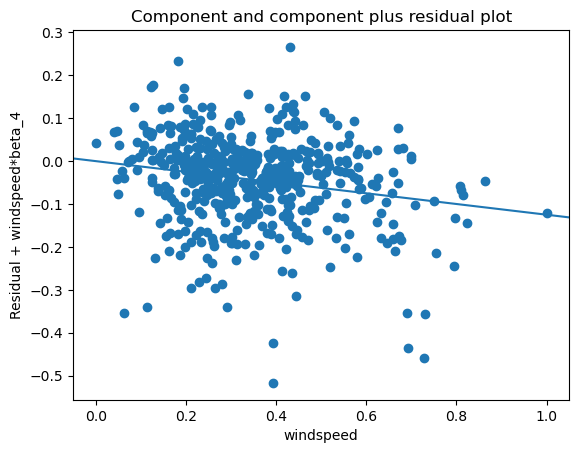

In [817]:
# Validate linear relationships using CCPR plots
# Component and Component Plus Residual plots

sm.graphics.plot_ccpr(lr4, 'atemp')
plt.show()

sm.graphics.plot_ccpr(lr4, 'year')
plt.show()

sm.graphics.plot_ccpr(lr4, 'windspeed')
plt.show()

### slight Linearity can be observed from above visualizations.

#### Homoscedasticity

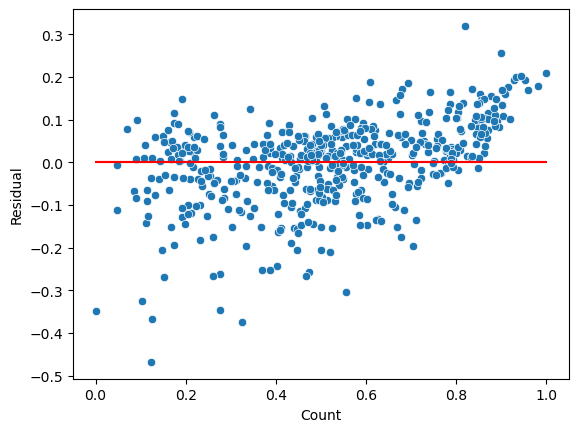

In [818]:
y_train_pred = lr4.predict(X_train_lm4)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train, y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### No visible pattern observed from above plot for residuals.

### Residual Independence 
### The Durbin-Watson value for the ultimate model, lr4, is 2.006, indicating the absence of autocorrelation.

### Step 7: Utilizing the Final Model for Predictions
Having successfully trained the model and verified the normality of error terms, it's now appropriate to proceed with generating predictions using the ultimate model, the 4th iteration.

In [819]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
train_data[num_vars] = scaler.transform(train_data[num_vars])
train_data.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light snow_rain,weathersit_mist
483,1,0,0,-0.058562,-0.091003,0.006337,-0.040166,-0.002448,0,1,...,0,0,0,0,1,0,0,0,0,0
650,1,0,0,-0.061023,-0.093027,0.005339,-0.038312,-0.002437,0,0,...,1,0,0,1,0,0,0,0,0,0
212,0,0,1,-0.046696,-0.082279,0.005946,-0.037641,-0.002475,0,0,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,-0.062191,-0.093766,0.009054,-0.041192,-0.002481,0,0,...,0,0,0,0,1,0,0,0,0,1
8,0,0,0,-0.070680,-0.102511,0.004687,-0.024623,-0.002520,1,0,...,0,0,0,0,1,0,0,0,0,0


In [820]:
y_test = test_data.pop('cnt')
X_test = test_data

In [821]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test)

In [825]:
y_pred = lr4.predict(X_test_lm4)

In [827]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

-5.6169

## Step 8: Model Evaluation

### Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

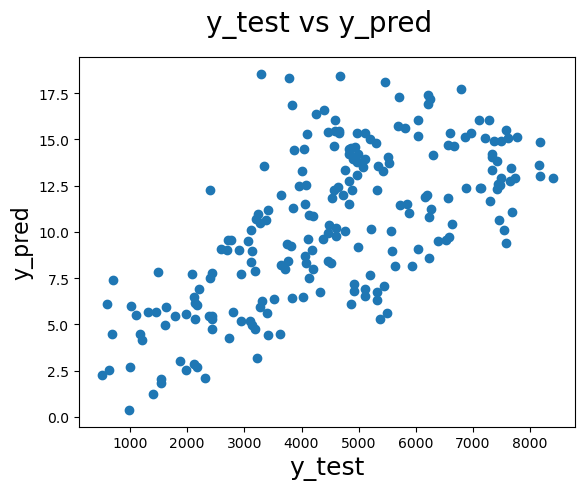

In [830]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [831]:
round(lr4.params,4)

const                          0.2156
year                           0.2345
holiday                       -0.0359
atemp                          0.4833
windspeed                     -0.1249
season_spring                 -0.1219
season_winter                  0.0438
month_july                    -0.0306
month_mar                      0.0515
month_sep                      0.0613
weekday_sat                    0.0151
weekday_sun                   -0.0360
weathersit_light snow_rain    -0.2870
dtype: float64

In [832]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

-6.0024


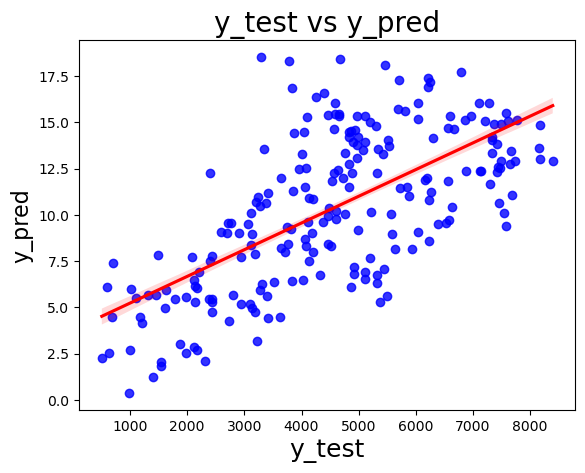

In [833]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Evaluation of Training and Testing Datasets
    - Train dataset R^2          : 0.799
    - Test dataset R^2           : 0.804
    - Train dataset Adjusted R^2 : 0.801    
    - Test dataset Adjusted R^2  : 0.781

#### The bike demand is contingent on factors such as year, holiday, temperature, windspeed, September, Light_snowrain, Misty, spring, summer, and winter.




